In [4]:
import numpy as np
import matplotlib.pyplot as plt

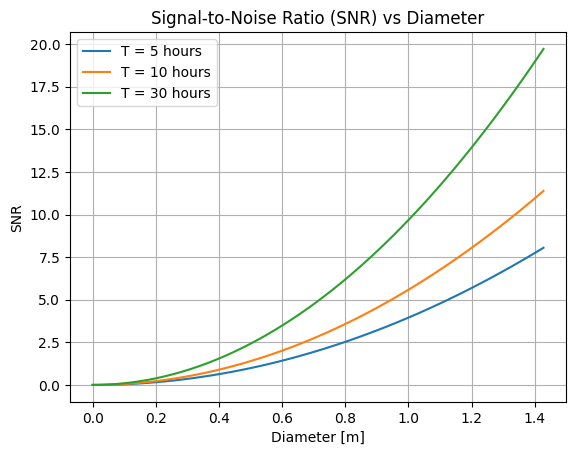

In [5]:
alpha = 0.15
V = 0.5
phi = 10**-5
T_ = [5, 10, 30]  # hours
T = [5*3600, 10*3600, 30*3600]  # seconds
delta_tau = 10**-10

# Function to calculate SNR
def snr(diameter, T):
    area = np.pi * (diameter / 2)**2
    return area * alpha * V**2 * phi * np.sqrt(T / (1 * delta_tau))

# Generate diameters
diameters = np.linspace(0, np.sqrt(1.6/np.pi) * 2, 100)  # Calculate the corresponding diameters for the given area range

# Plot SNR vs Diameter
plt.figure()
for i, t in enumerate(T):
    plt.plot(diameters, snr(diameters, t), label=f'T = {T_[i]} hours')

plt.xlabel('Diameter [m]')
plt.ylabel('SNR')
plt.title('Signal-to-Noise Ratio (SNR) vs Diameter')
plt.legend()
plt.grid(True)
plt.show()